# Часть 1 Бустинг (5 баллов)

В этой части будем предсказывать зарплату data scientist-ов в зависимости  от ряда факторов с помощью градиентного бустинга.

В датасете есть следующие признаки:



* work_year: The number of years of work experience in the field of data science.

* experience_level: The level of experience, such as Junior, Senior, or Lead.

* employment_type: The type of employment, such as Full-time or Contract.

* job_title: The specific job title or role, such as Data Analyst or Data Scientist.

* salary: The salary amount for the given job.

* salary_currency: The currency in which the salary is denoted.

* salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

* employee_residence: The country or region where the employee resides.

* remote_ratio: The percentage of remote work offered in the job.

* company_location: The location of the company or organization.

* company_size: The company's size is categorized as Small, Medium, or Large.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Задание 1 (0.5 балла) Подготовка



*   Разделите выборку на train, val, test (80%, 10%, 10%)
*   Выдерите salary_in_usd в качестве таргета
*   Найдите и удалите признак, из-за которого возможен лик в данных


In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
X = df.drop(columns = ['salary_in_usd'], axis=1)

In [ ]:
X = X.drop(columns = ['salary'], axis=1)

In [ ]:
X

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,US,100,US,L


In [ ]:
y = pd.DataFrame(df['salary_in_usd'])

In [ ]:
y

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000
...,...
3750,412000
3751,151000
3752,105000
3753,100000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
y_val

,salary_in_usd
671,200000
3639,66265
1742,199000
1203,140000
2631,156400
...,...
3689,6072
3599,72212
575,160000
1135,148500


## Задание 2 (0.5 балла) Линейная модель


*   Закодируйте категориальные  признаки с помощью OneHotEncoder
*   Обучите модель линейной регрессии
*   Оцените  качество через MAPE и RMSE


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_features = X.select_dtypes(include = 'object').columns
categorical_features

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [ ]:

encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encoder.fit(X[categorical_features])
X_train_categorical_features = encoder.transform(X_train[categorical_features])
X_val_categorical_features = encoder.transform(X_val[categorical_features])
X_test_categorical_features = encoder.transform(X_test[categorical_features])

In [ ]:
X_train = X_train.drop(X_train[categorical_features], axis=1)
X_val = X_val.drop(X_val[categorical_features], axis=1)
X_test = X_test.drop(X_test[categorical_features], axis=1)
X_train = X_train.join(X_train_categorical_features)
X_val = X_val.join(X_val_categorical_features)
X_test = X_test.join(X_test_categorical_features)

In [ ]:


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mape = mean_absolute_percentage_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print('MAPE on test: ', mape)
print('RMSE on test: ', np.sqrt(mse))

MAPE on test:  0.32914440738102174
RMSE on test:  3783520908235.4946


## Задание 3 (0.5 балла) XGboost

Начнем с библиотеки xgboost.

Обучите модель `XGBRegressor` на тех же данных, что линейную модель, подобрав оптимальные гиперпараметры (`max_depth, learning_rate, n_estimators, gamma`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
import numpy as np
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
xgb = XGBRegressor()

param_grid = {
    'max_depth': [3, 5, 7, 11],
    'learning_rate': [0.1, 0.2, 0,3],
}
grid_search1 = GridSearchCV(xgb, param_grid, scoring = ('neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'),refit = 'neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search1.fit(X_val, y_val)

grid_search1.best_params_

{'learning_rate': 0.2, 'max_depth': 3}

In [ ]:
xgb_model = XGBRegressor(
    max_depth = 3,
    learning_rate = 0.1
)

In [ ]:
params2 = {
    'n_estimators' : [70, 100, 150, 200, 300],
    'gamma' : [-1, 0, 0.5, 1, 1.5],
}

gsearch2 = GridSearchCV(
    estimator=xgb_model, param_grid=params2, scoring = ('neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'),refit = 'neg_root_mean_squared_error', n_jobs=-1, cv=5
)

gsearch2.fit(X_val, y_val)


gsearch2.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
 

{'gamma': 0, 'n_estimators': 100}

In [ ]:
xgb_model = XGBRegressor(
    max_depth = 3,
    learning_rate = 0.1,
    n_estimators = 70,
    gamma = 0
)


start_time = time.time()
xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = xgb_model.predict(X_val)
predict_time = time.time() - start_time

print("Время обучения:", train_time, "секунд")
print("Время предсказания:", predict_time, "секунд")

print(f'MAPE on train: {mean_absolute_percentage_error(y_train, xgb_model.predict(X_train))}')
print(f'RMSE on train: {mean_squared_error(y_train, xgb_model.predict(X_train))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val, xgb_model.predict(X_val))}')
print(f'RMSE on val: {mean_squared_error(y_val, xgb_model.predict(X_val))}')

Время обучения: 0.3034858703613281 секунд
Время предсказания: 0.03327345848083496 секунд
MAPE on train: 0.3580792505582509
RMSE on train: 2116001258.6070333
MAPE on val: 0.40597834094686946
RMSE on val: 2634174379.6158323


## Задание 4 (1 балл) CatBoost

Теперь библиотека CatBoost.

Обучите модель `CatBoostRegressor`, подобрав оптимальные гиперпараметры (`depth, learning_rate, iterations`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# params = {
#     'depth' : ,
#     'learning_rate' : ,
#     'iterations' :,
# }

# -- YOUR CODE HERE --

In [ ]:
cat = CatBoostRegressor()

param_grid3 = {
    'depth': [2, 3, 4, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
}
grid_search3 = GridSearchCV(cat, param_grid3, scoring = ('neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'),refit = 'neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search3.fit(X_val, y_val)

grid_search3.best_params_

0:	learn: 64911.6628202	total: 55.4ms	remaining: 55.3s
1:	learn: 63750.8666615	total: 55.7ms	remaining: 27.8s
2:	learn: 62954.1529069	total: 56.1ms	remaining: 18.6s
3:	learn: 62152.9029643	total: 59.2ms	remaining: 14.8s
4:	learn: 61447.1318829	total: 61.6ms	remaining: 12.3s
5:	learn: 60734.3923966	total: 64.4ms	remaining: 10.7s
6:	learn: 60298.3393838	total: 67.7ms	remaining: 9.6s
7:	learn: 59843.8960493	total: 70.2ms	remaining: 8.7s
8:	learn: 59407.9459827	total: 73ms	remaining: 8.03s
9:	learn: 58576.6308875	total: 85.5ms	remaining: 8.47s
10:	learn: 58311.9570941	total: 89.7ms	remaining: 8.06s
11:	learn: 57958.9191939	total: 94.2ms	remaining: 7.76s
12:	learn: 57327.4371655	total: 97.6ms	remaining: 7.41s
13:	learn: 57202.7239414	total: 98.7ms	remaining: 6.95s
14:	learn: 57023.5511274	total: 102ms	remaining: 6.69s
15:	learn: 56686.2094713	total: 104ms	remaining: 6.37s
16:	learn: 56198.6787661	total: 106ms	remaining: 6.11s
17:	learn: 56101.1481232	total: 108ms	remaining: 5.9s
18:	learn: 

{'depth': 2, 'learning_rate': 0.1}

In [ ]:
cat = CatBoostRegressor(
    depth = 2,
    learning_rate = 0.1
)

param_grid4 = {
    'iterations':[ 300, 400, 500]
}
grid_search4 = GridSearchCV(cat, param_grid4, scoring = ('neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'),refit = 'neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search4.fit(X_val, y_val)

grid_search4.best_params_

0:	learn: 64911.6628202	total: 454us	remaining: 227ms
1:	learn: 63750.8666615	total: 742us	remaining: 185ms
2:	learn: 62954.1529069	total: 1.34ms	remaining: 223ms
3:	learn: 62152.9029643	total: 1.59ms	remaining: 198ms
4:	learn: 61447.1318829	total: 2.33ms	remaining: 231ms
5:	learn: 60734.3923966	total: 3.13ms	remaining: 258ms
6:	learn: 60298.3393838	total: 3.4ms	remaining: 239ms
7:	learn: 59843.8960493	total: 4.18ms	remaining: 257ms
8:	learn: 59407.9459827	total: 4.48ms	remaining: 244ms
9:	learn: 58576.6308875	total: 4.77ms	remaining: 234ms
10:	learn: 58311.9570941	total: 5.23ms	remaining: 233ms
11:	learn: 57958.9191939	total: 5.44ms	remaining: 221ms
12:	learn: 57327.4371655	total: 5.63ms	remaining: 211ms
13:	learn: 57202.7239414	total: 6.15ms	remaining: 214ms
14:	learn: 57023.5511274	total: 6.71ms	remaining: 217ms
15:	learn: 56686.2094713	total: 6.9ms	remaining: 209ms
16:	learn: 56198.6787661	total: 7.08ms	remaining: 201ms
17:	learn: 56101.1481232	total: 7.49ms	remaining: 200ms
18:	le

{'iterations': 500}

In [ ]:
cat = CatBoostRegressor(
    depth = 2,
    learning_rate = 0.1,
    iterations = 300
)

In [ ]:
start_time = time.time()
cat.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = cat.predict(X_val)
predict_time = time.time() - start_time

0:	learn: 61110.5941727	total: 1.09ms	remaining: 326ms
1:	learn: 59696.0923255	total: 19.9ms	remaining: 2.96s
2:	learn: 58592.3777656	total: 22.5ms	remaining: 2.23s
3:	learn: 57494.0078139	total: 27.3ms	remaining: 2.02s
4:	learn: 56591.5647813	total: 30.1ms	remaining: 1.78s
5:	learn: 55799.1740886	total: 34.4ms	remaining: 1.69s
6:	learn: 55098.2688485	total: 35.5ms	remaining: 1.49s
7:	learn: 54522.8018216	total: 40.8ms	remaining: 1.49s
8:	learn: 54048.2002118	total: 42.9ms	remaining: 1.39s
9:	learn: 53567.3794510	total: 45.8ms	remaining: 1.33s
10:	learn: 53040.3508585	total: 48.1ms	remaining: 1.26s
11:	learn: 52677.3384502	total: 50.6ms	remaining: 1.22s
12:	learn: 52378.6794713	total: 57.9ms	remaining: 1.28s
13:	learn: 52004.1785594	total: 65.6ms	remaining: 1.34s
14:	learn: 51800.5247892	total: 67.9ms	remaining: 1.29s
15:	learn: 51590.6793742	total: 70.6ms	remaining: 1.25s
16:	learn: 51366.6423472	total: 73.4ms	remaining: 1.22s
17:	learn: 51173.1413866	total: 79.2ms	remaining: 1.24s
18

In [ ]:
print("Время обучения:", train_time, "секунд")
print("Время предсказания:", predict_time, "секунд")

print(f'MAPE on train: {mean_absolute_percentage_error(y_train, cat.predict(X_train))}')
print(f'RMSE on train: {mean_squared_error(y_train, cat.predict(X_train))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val, cat.predict(X_val))}')
print(f'RMSE on val: {mean_squared_error(y_val, cat.predict(X_val))}')

Время обучения: 1.157921552658081 секунд
Время предсказания: 0.014985799789428711 секунд
MAPE on train: 0.3533043385818889
RMSE on train: 2116511801.412489
MAPE on val: 0.3966652502912881
RMSE on val: 2612364204.1949725


Для применения catboost моделей не обязательно сначала кодировать категориальные признаки, модель может кодировать их сама. Обучите catboost с подбором оптимальных гиперпараметров снова, используя pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметра cat_features. Оцените качество и время. Стало ли лучше?

In [ ]:
from catboost import Pool

df = pd.read_csv("ds_salaries.csv")
X = df.drop(columns = ['salary_in_usd'], axis=1)
X1 = X.drop(columns = ['salary', 'salary_currency'], axis=1)
y1 = pd.DataFrame(df['salary_in_usd'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.1)

In [ ]:
categorical_features = X1.select_dtypes(include = 'object').columns.tolist()
categorical_features

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [ ]:
train_pool = Pool(data = X_train1, cat_features= categorical_features, label = y_train1)
val_pool = Pool(data = X_val1, cat_features= categorical_features, label = y_val1)

In [ ]:

params = {'loss_function':'RMSE',
          'eval_metric':'MAPE',
          'learning_rate': 0.1,
        'depth': 3,
        'iterations': 464,
          'early_stopping_rounds': 200,
          'verbose': 200
         }
cat1 = CatBoostRegressor(**params)


start_time = time.time()
cat1.fit(train_pool,
          eval_set=val_pool,
          use_best_model=True,
          plot=True
         );
train_time = time.time() - start_time

start_time = time.time()
y_pred = cat1.predict(X_test1)
predict_time = time.time() - start_time

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7046466	test: 0.4887647	best: 0.4887647 (0)	total: 9.48ms	remaining: 4.39s
200:	learn: 0.3648942	test: 0.3082272	best: 0.3081998 (199)	total: 1.28s	remaining: 1.67s
400:	learn: 0.3530857	test: 0.3018019	best: 0.3015819 (399)	total: 2.26s	remaining: 356ms
463:	learn: 0.3495676	test: 0.3007880	best: 0.3007880 (463)	total: 3.27s	remaining: 0us

bestTest = 0.3007880143
bestIteration = 463



In [ ]:
print("Время обучения:", train_time, "секунд")
print("Время предсказания:", predict_time, "секунд")

print(f'MAPE on train: {mean_absolute_percentage_error(y_train1, cat1.predict(X_train1))}')
print(f'RMSE on train: {mean_squared_error(y_train1, cat1.predict(X_train1))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val1, cat1.predict(X_val1))}')
print(f'RMSE on val: {mean_squared_error(y_val1, cat1.predict(X_val1))}')

Время обучения: 3.579393148422241 секунд
Время предсказания: 0.013347864151000977 секунд
MAPE on train: 0.33074280603894135
RMSE on train: 2133187364.8771324
MAPE on val: 0.3007880143046749
RMSE on val: 2137925996.3964765


**Ответ:** Мы видим, что на тесте качество незначительно улучшилось, но на валидационной выборке качество наоборот ухудшилось.

Если говорить о времени, то мы видим, что время обучения увеличилось больше чем на единицу, что не есть хорошо, но время предсказания стало намного меньше, чем в предыдущем примере.

## Задание 5 (0.5 балла) LightGBM

И наконец библиотека LightGBM - используйте `LGBMRegressor`, снова подберите гиперпараметры, оцените качество и скорость.


In [ ]:
from lightgbm import LGBMRegressor


estimator = LGBMRegressor(num_leaves=31)

param_grid = {"learning_rate": [0.01, 0.1, 0.2, 0.3, 1], "n_estimators": [20, 40, 50, 60]}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print("Best parameters found by grid search are:", gbm.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 2027, number of used features: 37
[LightGBM] [Info] Start training from score 138339.650715
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 2027, number of used features: 38
[LightGBM] [Info] Start training from score 138468.466206
[LightGBM] [Warning] Fou

In [ ]:
gbm = LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=40)
start_time = time.time()
gbm.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
)
train_time = time.time() - start_time


start_time = time.time()
y_pred = cat1.predict(X_test1)
predict_time = time.time() - start_time

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 3041, number of used features: 41
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 138330.131865


In [ ]:
print("Время обучения:", train_time, "секунд")
print("Время предсказания:", predict_time, "секунд")

print(f'MAPE on train: {mean_absolute_percentage_error(y_train, gbm.predict(X_train))}')
print(f'RMSE on train: {mean_squared_error(y_train, gbm.predict(X_train))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val, gbm.predict(X_val))}')
print(f'RMSE on val: {mean_squared_error(y_val, gbm.predict(X_val))}')

Время обучения: 0.16423439979553223 секунд
Время предсказания: 0.005096435546875 секунд
MAPE on train: 0.33136615965058547
RMSE on train: 2100425054.095197
MAPE on val: 0.37057171780825937
RMSE on val: 2536367517.765638


## Задание 6 (2 балла) Сравнение и выводы

In [ ]:
print(f'MAPE on train: {mean_absolute_percentage_error(y_train, xgb_model.predict(X_train))}')
print(f'RMSE on train: {mean_squared_error(y_train, xgb_model.predict(X_train))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val, xgb_model.predict(X_val))}')
print(f'RMSE on val: {mean_squared_error(y_val, xgb_model.predict(X_val))}')
print(f'MAPE on test: {mean_absolute_percentage_error(y_test, xgb_model.predict(X_test))}')
print(f'RMSE on test: {mean_squared_error(y_test, xgb_model.predict(X_test))}')

MAPE on train: 0.3580792505582509
RMSE on train: 2116001258.6070333
MAPE on val: 0.40597834094686946
RMSE on val: 2634174379.6158323
MAPE on test: 0.39700171836573006
RMSE on test: 2163760184.624127


In [ ]:
print(f'MAPE on train: {mean_absolute_percentage_error(y_train, cat.predict(X_train))}')
print(f'RMSE on train: {mean_squared_error(y_train, cat.predict(X_train))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val, cat.predict(X_val))}')
print(f'RMSE on val: {mean_squared_error(y_val, cat.predict(X_val))}')
print(f'MAPE on test: {mean_absolute_percentage_error(y_test, cat.predict(X_test))}')
print(f'RMSE on test: {mean_squared_error(y_test, cat.predict(X_test))}')

MAPE on train: 0.3533043385818889
RMSE on train: 2116511801.412489
MAPE on val: 0.3966652502912881
RMSE on val: 2612364204.1949725
MAPE on test: 0.39757017206963163
RMSE on test: 2271546978.960482


In [ ]:
print(f'MAPE on train: {mean_absolute_percentage_error(y_train1, cat1.predict(X_train1))}')
print(f'RMSE on train: {mean_squared_error(y_train1, cat1.predict(X_train1))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val1, cat1.predict(X_val1))}')
print(f'RMSE on val: {mean_squared_error(y_val1, cat1.predict(X_val1))}')
print(f'MAPE on test: {mean_absolute_percentage_error(y_test1, cat1.predict(X_test1))}')
print(f'RMSE on test: {mean_squared_error(y_test1, cat1.predict(X_test1))}')

MAPE on train: 0.33074280603894135
RMSE on train: 2133187364.8771324
MAPE on val: 0.3007880143046749
RMSE on val: 2137925996.3964765
MAPE on test: 0.35288805529309436
RMSE on test: 2369862022.1539607


In [ ]:
print(f'MAPE on train: {mean_absolute_percentage_error(y_train, gbm.predict(X_train))}')
print(f'RMSE on train: {mean_squared_error(y_train, gbm.predict(X_train))}')
print(f'MAPE on val: {mean_absolute_percentage_error(y_val, gbm.predict(X_val))}')
print(f'RMSE on val: {mean_squared_error(y_val, gbm.predict(X_val))}')
print(f'MAPE on test: {mean_absolute_percentage_error(y_test, gbm.predict(X_test))}')
print(f'RMSE on test: {mean_squared_error(y_test, gbm.predict(X_test))}')

MAPE on train: 0.33136615965058547
RMSE on train: 2100425054.095197
MAPE on val: 0.37057171780825937
RMSE on val: 2536367517.765638
MAPE on test: 0.353262094270989
RMSE on test: 2144770754.9622815


Сравните модели бустинга и сделайте про них выводы, какая из моделей показала лучший/худший результат по качеству, скорости обучения и скорости предсказания? Как отличаются гиперпараметры для разных моделей?

**Ответ:** В моем случае лучшей моделью оказалась LightGbm на тестовой выборке она показывает лучшие результаты как по MAPE, так и по RMSE.

По скорости обучения и скорости предсказания также оказалось, что LightGbm лучше чем остальные примененные модели.


У всех моделей очень похожие гиперпараметры. Они могут отличаться названием, но выполняют одну и ту же функцию.

# Часть 2 Кластеризация (5 баллов)

Будем работать с данными о том, каких исполнителей слушают пользователи музыкального сервиса.

Каждая строка таблицы - информация об одном пользователе. Каждый столбец - это исполнитель (The Beatles, Radiohead, etc.)

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля прослушивания этого исполнителя этим пользователем.


In [ ]:
import pandas as pd
ratingss = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratingss.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings = ratingss

In [ ]:
lab = ratingss.columns.values[1:]

In [ ]:
lab

array(['the beatles', 'radiohead', 'deathcab for cutie', 'coldplay',
       'modest mouse', 'sufjan stevens', 'dylan. bob',
       'red hot clili peppers', 'pink fluid', 'kanye west', 'niИ',
       'the shins', 'led zeppelin.', 'elliotte smith', 'beck',
       'divid bowie', 'the killers', 'daft punk', 'the arcade fire',
       'muse', 'the smashing pumpkins', 'white stripes',
       'the decemberists', 'the rolling stones', 'bright eyes',
       'the pixies', 'belle and sebastian', 'sigur rós', 'ironand wine',
       'the cure', 'greenday', 'blink-182', 'johnson jack',
       '\u200clinkin park', 'johnny clash', 'gorillaz', 'incubus',
       'queen', 'animal collective', 'u2', 'the smiths', 'of montreal',
       'fall out boy', 'brand new', '￼beastie boys', 'spoon', 'nirvana',
       'the postal service', 'bloc party', 'foo fighters', 'the clash',
       'björk guğmunsdóttir', 'metallica', 'cake', 'sublime', 'interpol',
       'regina spektor', 'tom waits', 'john mayer', 'andrew bird'

Будем строить кластеризацию исполнителей: если двух исполнителей слушало много людей примерно одинаковую долю своего времени (то есть векторы близки в пространстве), то, возможно исполнители похожи. Эта информация может быть полезна при построении рекомендательных систем.

## Задание 1 (0.5 балла) Подготовка

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [ ]:
ratings = ratings.T

In [ ]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.000000
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выкиньте строку под названием `user`.

In [ ]:
ratings = ratings.drop('user', axis=0)

In [ ]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице много пропусков, так как пользователи слушают не всех-всех исполнителей, чья музыка представлена в сервисе, а некоторое подмножество (обычно около 30 исполнителей)


Доля исполнителя в музыке, прослушанной  пользователем, равна 0, если пользователь никогда не слушал музыку данного музыканта, поэтому заполните пропуски нулями.



In [ ]:
ratings = ratings.fillna(0.0)
ratings.sample()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the pussycat dolls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64

## Задание 2 (0.5 балла) Первая кластеризация

Примените KMeans с 5ю кластерами, сохраните полученные лейблы

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5)
kmeans.fit(ratings)
clusters = kmeans.predict(ratings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Выведите размеры кластеров. Полезной ли получилась кластеризация? Почему KMeans может выдать такой результат?

In [ ]:
sizes = pd.Series(clusters).value_counts()

In [ ]:
sizes

1    996
0      1
4      1
3      1
2      1
Name: count, dtype: int64

**Ответ:** Кластеризация оказалась бесполезной, так как
большинство объектов она отнесла к одному классу.

Так как в данных много пропусков, то KMeans не смог найти отличия между разными исполнителями. Также может быть так, что n_clusters = 5 мало для этих данных.

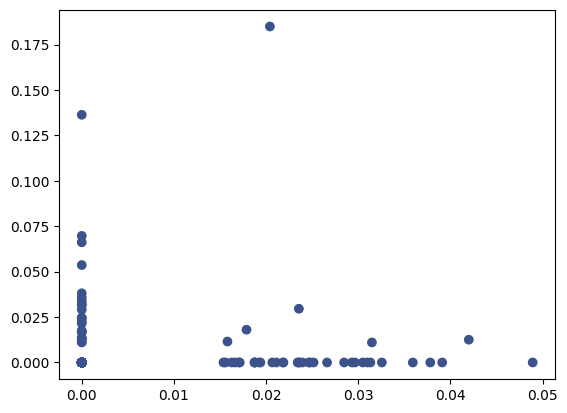

In [ ]:
plt.scatter(ratings.iloc[:,0], ratings.iloc[:,1], c = clusters)

## Задание 3 (0.5 балла) Объяснение результатов

При кластеризации получилось $\geq 1$ кластера размера 1. Выведите исполнителей, которые составляют такие кластеры. Среди них должна быть группа The Beatles.

In [ ]:
cluster_size = sizes[sizes == 1].index.tolist()

In [ ]:
cluster_size

[0, 4, 3, 2]

In [ ]:
for i in cluster_size:
  print(f'Исполнители, составляющие кластеры размера 1: {ratings[i]}')

Исполнители, составляющие кластеры размера 1: the beatles           0.000000
radiohead             0.020417
deathcab for cutie    0.000000
coldplay              0.000000
modest mouse          0.000000
                        ...   
michal w. smith       0.000000
群星                    0.000000
agalloch              0.000000
meshuggah             0.000000
yellowcard            0.000000
Name: 0, Length: 1000, dtype: float64
Исполнители, составляющие кластеры размера 1: the beatles           0.043529
radiohead             0.086281
deathcab for cutie    0.034590
coldplay              0.016712
modest mouse          0.015935
                        ...   
michal w. smith       0.000000
群星                    0.000000
agalloch              0.000000
meshuggah             0.000000
yellowcard            0.000000
Name: 4, Length: 1000, dtype: float64
Исполнители, составляющие кластеры размера 1: the beatles           0.0
radiohead             0.0
deathcab for cutie    0.0
coldplay              0.0


Изучите данные, почему именно The Beatles выделяется?

Подсказка: посмотрите на долю пользователей, которые слушают каждого исполнителя, среднюю долю прослушивания.

In [ ]:
listen_to_every = 0
for i in range(ratings.shape[0]):
  if ratings[i].value_counts()[0] == 0:
    listen_to_every += 1

In [ ]:
ratings.shape

(1000, 5000)

In [ ]:
listen_to_every

0



---

Получаем, что нет таких пользователей, которые слушали бы каждого исполнителя, представленного на сервисе.

---



In [ ]:
ratings[0]

the beatles           0.000000
radiohead             0.020417
deathcab for cutie    0.000000
coldplay              0.000000
modest mouse          0.000000
                        ...   
michal w. smith       0.000000
群星                    0.000000
agalloch              0.000000
meshuggah             0.000000
yellowcard            0.000000
Name: 0, Length: 1000, dtype: float64

In [ ]:
perc_listen_to = []
for i in range(ratings.shape[0]):
  perc_listen_to.append((5000 - ratings.iloc[i].value_counts()[0])/ratings.shape[1])

In [ ]:
perc_listen_to

[0.3342,
 0.2778,
 0.1862,
 0.1682,
 0.1628,
 0.1292,
 0.1262,
 0.1258,
 0.1256,
 0.125,
 0.1182,
 0.1182,
 0.118,
 0.1166,
 0.1138,
 0.1118,
 0.1096,
 0.108,
 0.1064,
 0.1058,
 0.1048,
 0.1018,
 0.1012,
 0.1012,
 0.0992,
 0.0974,
 0.0962,
 0.0936,
 0.0932,
 0.0922,
 0.0888,
 0.0886,
 0.0882,
 0.0866,
 0.086,
 0.0846,
 0.0846,
 0.0842,
 0.084,
 0.0832,
 0.083,
 0.0826,
 0.0804,
 0.0802,
 0.0794,
 0.0792,
 0.0792,
 0.0788,
 0.0784,
 0.0784,
 0.0772,
 0.0744,
 0.073,
 0.0726,
 0.0722,
 0.072,
 0.0718,
 0.0716,
 0.07,
 0.0694,
 0.0692,
 0.0688,
 0.068,
 0.068,
 0.0664,
 0.0664,
 0.0664,
 0.0662,
 0.0656,
 0.0652,
 0.0642,
 0.064,
 0.0636,
 0.0626,
 0.0622,
 0.0622,
 0.062,
 0.062,
 0.0616,
 0.0614,
 0.061,
 0.0608,
 0.0596,
 0.0594,
 0.0594,
 0.059,
 0.059,
 0.0584,
 0.0584,
 0.0582,
 0.0578,
 0.0572,
 0.0572,
 0.0568,
 0.0562,
 0.056,
 0.0558,
 0.054,
 0.0538,
 0.0534,
 0.0532,
 0.053,
 0.0528,
 0.0526,
 0.0524,
 0.0518,
 0.0516,
 0.0514,
 0.0512,
 0.0512,
 0.051,
 0.051,
 0.0508,
 0.050

In [ ]:
max(perc_listen_to)

0.3342



---
Получаем, что группу 'the beatles' больше всего людей слушает. От всех пользователей сервиса 'the beatles' слушают примерно 33% слушателей.

---





**Ответ:** # -- YOUR ANSWER HERE --

## Задание 4 (0.5 балла) Улучшение кластеризации

Попытаемся избавиться от этой проблемы: нормализуйте данные при помощи `normalize`.

In [ ]:
ratings_ar = ratings.to_numpy()

In [ ]:
from sklearn.preprocessing import normalize

ratings = df = pd.DataFrame(normalize(ratings_ar), index=lab)


In [ ]:
import plotly.express as px

In [ ]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Примените KMeans с 5ю кластерами на преобразованной матрице, посмотрите на их размеры. Стало ли лучше? Может ли кластеризация быть полезной теперь?

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(ratings)
clusters = kmeans.predict(ratings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pd.Series(clusters).value_counts()

1    409
2    222
0    166
3    104
4     99
Name: count, dtype: int64

**Ответ** Мы видем, что после нормализации KMeans работает лучше и у нас получаются более менее сбалансированные кластеры. Очевидно, что стало лучше. После нормализации кластеризация может стать полезной.

## Задание 5 (1 балл) Центроиды

Выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду по косинусной мере. Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [ ]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
from scipy.spatial.distance import cosine

centroids = kmeans.cluster_centers_.tolist()
res = []
for i in lab:
  dist = [cosine(ratings.loc[i], centroid) for centroid in centroids]
  res.append(dist)

In [ ]:
res = pd.DataFrame(res,index=lab)

In [ ]:
for i in range(5):
  res.sort_values(by=i, inplace=True, ascending=False)
  print(f'Топ-10 исполнителей для {i+1}-ого центроида {res[:10].index}')


Топ-10 исполнителей для 1-ого центроида Index(['def leppard', 'kamelot', 'creed', 'carrie underwood',
       'sonata arctica1', 'michal w. smith', 'queensrÿche', 'skillet',
       'cйline dion', 'arch enemy'],
      dtype='object')
Топ-10 исполнителей для 2-ого центроида Index(['cannibal corpse', 'the black dahlia murder', 'chamillionaire',
       'lamb of god', 'bone: thugs~n~harmony', '보아', 'bring me the horizon',
       'owl city', 'jonas brothers', 't-pain'],
      dtype='object')
Топ-10 исполнителей для 3-ого центроида Index(['michal w. smith', 'matt pond pa', 'glenn　gould', 'kevin devine',
       'le tigre', 'patrick wolf', 'the fall', 'rachael yamagata',
       'josh ritter', 'gillian welch'],
      dtype='object')
Топ-10 исполнителей для 4-ого центроида Index(['the fall', 'can', 'captain beefhearth & his magic band', 'kraftwerk',
       'kylie minogue', 'sly & the family stone', 'franklin aretha',
       'diana krall', 'the jesus and mary chain', 'shpongle'],
      dtype='objec

**Ответ:** KMeans разделил исполнителей на 5 групп так, что в первой группе оказадись рок-группы, во второй группе оказались рэперы, различные металл-группы. То есть мы получили разделение на группы, внутри которых жанр музыки очень похож.

## Задание 6 (1 балл) Визуализация

Хотелось бы как-то визуализировать полученную кластеризацию. Постройте точечные графики `plt.scatter` для нескольких пар признаков исполнителей, покрасив точки в цвета кластеров. Почему визуализации получились такими? Хорошо ли они отражают разделение на кластеры? Почему?

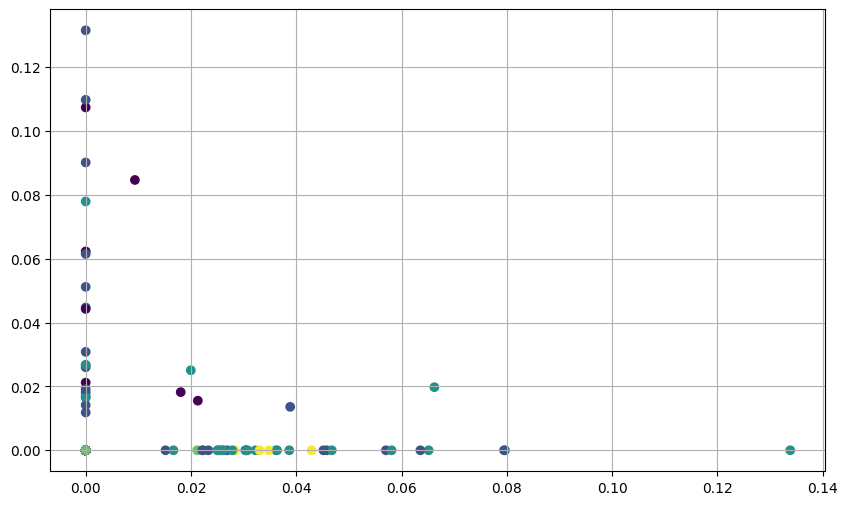

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.scatter(ratings.iloc[:,0], ratings.iloc[:,1], c = clusters)
plt.grid(True)

**Ответ:** Визуализация получилась именно такой, потому что мы строим график только по двум признакам, то есть в двумерном пространстве, из-за этого точки, которые похожи по этим призанакам, но различны по другим накладываются друг на друга и возникает ощущение, что все объекты должны относится к одному классу.

Плохо отражает разделение на кластеры по выше изложенным причинам.

Для визуализации данных высокой размерности существует метод t-SNE (стохастическое вложение соседей с t-распределением). Данный метод является нелинейным методом снижения размерности: каждый объект высокой размерности будет моделироваться объектов более низкой (например, 2) размерности таким образом, чтобы похожие объекты моделировались близкими, непохожие - далекими с большой вероятностью.

Примените `TSNE` из библиотеки `sklearn` и визуализируйте полученные объекты, покрасив их в цвета их кластеров

In [ ]:
from sklearn.manifold import TSNE
n_clusters = len(np.unique(clusters[clusters != -1]))
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
transformed_features = tsne.fit_transform(ratings)



In [ ]:
df_ = pd.concat([
    pd.DataFrame(transformed_features, columns=['x', 'y']),
    pd.Series(clusters)
], axis=1)

In [ ]:
px.scatter(data_frame=df_, x="x", y="y", color=pd.Series(clusters))

## Задание 7 (1 балл) Подбор гиперпараметров

Подберите оптимальное количество кластеров (максимум 100 кластеров) с использованием индекса Силуэта. Зафиксируйте `random_state=42`

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

best_k, best_score = None, -1
for k in range(2, 101):
  k_means = KMeans(n_clusters=k, random_state=42)
  k_means = k_means.fit(ratings)
  clusters = k_means.predict(ratings)
  score = np.round(silhouette_score(X=ratings,
                             labels=clusters), 2)

  if score > best_score:
    best_score = score
    best_k = k
print(f'Самые лучшие гиперпараметры: {best_k, best_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KeyboardInterrupt: 

Выведите исполнителей, ближайших с центроидам (аналогично заданию 5). Как соотносятся результаты? Остался ли смысл кластеров прежним? Расскажите про смысл 1-2 интересных кластеров, если он изменился и кластеров слишком много, чтобы рассказать про все.

In [ ]:
best_kmeans = KMeans(n_clusters = 95)
best_kmeans = best_kmeans.fit(ratings)
clusterss = best_kmeans.predict(ratings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
len(best_kmeans.cluster_centers_)


86

In [ ]:
centroids = best_kmeans.cluster_centers_

In [ ]:
for cluster_index, centroid in enumerate(centroids):
    current_cluster_ratings = ratings.iloc[np.where(clusters == cluster_index)[0], :]
    similarities = current_cluster_ratings.apply(lambda x: cosine(x, centroid), axis=1).sort_values()[:9]
    print(f"{cluster_index=}")
    #current_cluster_ratings.order
    print(similarities)
    print()

cluster_index=0
m. ward             0.966648
pulp                0.977106
sparklehorse        0.991897
thhe raveonettes    0.992837
snow potrol         0.992987
nujabes             0.997773
dtype: float64

cluster_index=1
the go! team                0.637054
architecture in helsinki    0.873351
belle and sebastian         0.903835
neutral milk hotel          0.937544
jens lekman                 0.942231
the magnetic fields         0.944545
regina spektor              0.946497
camera obscura              0.949993
the mountain goats          0.957882
dtype: float64

cluster_index=2
alkaline trio               0.843980
descendents                 0.905005
against me!                 0.910201
the lawrence arms           0.918485
the glaslight anthem        0.950864
hot water music             0.952926
jawbreaker                  0.955577
bomb the music industry!    0.959869
screeching weasel           0.960230
dtype: float64

cluster_index=3
diana krall     0.993827
日dir en grey    0.99450

**Ответ:** Сейчас мы получили более точное разделение на кластеры. Например в кластере номер 80 присутствуют только классические композиторы, такие как Вивальди, Бах, Шопен, хотя присутствует и одна рок группа, что ни есть хорошо.



Сделайте t-SNE визуализацию полученной кластеризации.

In [ ]:

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
transformed_features = tsne.fit_transform(ratings)

In [ ]:
df_1 = pd.concat([
    pd.DataFrame(transformed_features, columns=['x', 'y']),
    pd.Series(clusters)
], axis=1)

In [ ]:
px.scatter(data_frame=df_1, x="x", y="y", color=pd.Series(clusters))

Если кластеров получилось слишком много и визуально цвета плохо отличаются, покрасьте только какой-нибудь интересный кластер из задания выше (`c = (labels == i)`). Хорошо ли этот кластер отражается в визуализации?

In [ ]:
px.scatter(data_frame=df_1, x="x", y="y", color=pd.Series(clusters) == 17)

**Ответ:** Можно говорить о том, что кластер хорошо выделился несмотря на пару точек, которые находятся далеко от кластера.

Мы получили, что кластеры, которые не относятся к классической музыке, выделелись превосходно, что очевидно поскольку классическая музыка не так популярна в обществе.